### Assignment

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/PZ SIB/Hands-on & HW/telco_customer_churn.csv')
df2 = pd.read_csv('/content/drive/MyDrive/PZ SIB/Hands-on & HW/apartment_data.csv')

df3 = sns.load_dataset("penguins")
df3 = df3.dropna().reset_index(drop = True)

#### Soal
1. Data: Telco Customer Churn (df)

    a. Gambarlah histogram dari kolom 'Tenure', dan pisahkan dengan warna berdasarkan Churn. Namun, pada visualisasi tersebut, tambahkan pula 'Density Plot' di atas Histogram sehingga hasil akhir visualisasinya menjadi seperti yang terlihat pada Slide. 

    b. Buatlah Stacked Bar Chart yang memperlihatkan rasio dari kolom 'InternetService' terhadap customer-customer yang Churn dan Non Churn. 
    
    c. Jawablah pertanyaan ini: bagi customer yang Churn, kebanyakan dari mereka memiliki InternetService tipe apa? 

2. Data: Apartment Data (df2)

    a. Buatlah sebuah bar plot di mana sumbu-x adalah kolom `Bathroom`, dan sumbu-y adalah kolom `AnnualPrice` (yang dirata-ratakan menurut kolom `Bathroom`). Jadi, kita ingin melihat, berapa `AnnualPrice` rata-rata untuk apartement yang memiliki 0, 1, 2, 3 `Bathroom`. 
    
    b. Jawablah pertanyaan ini: apartment dengan berapa kamar mandi yang memiliki rata-rata Annual Price paling tinggi?

3. Data: Penguins (df3)

    a. Buatlah visualisasi scatterplot menggunakan Sub Plots (materi Day 8). Terdapat 2 Sub Plots yang akan dibuat, dengan ketentuan berikut:
    - Terdapat 2 scatterplot. Posisi subplots adalah 1 kolom dan 2 baris. Artinya, kedua scatterplot yang akan kita gambar akan saling tumpuk-menumpuk (ada yang di atas, ada yang di bawah). 
    - Scatterplot pertama: sumbu-x: `body_mass_g`, sumbu-y: `flipper_length_mm`
    - Scatterplot kedua: sumbu-x: `body_mass_g`, sumbu-y: `bill_length_mm`
    - Scatterplot diberi warna berdasarkan kolom `island`. Terserah menggunakan color palette apa pun.
    - Gantilah nama dari masing-masing sumbu sehingga lebih menarik dan enak dibaca (tidak di-set default)
    - Berilah judul dari visualisasi yang dibuat (bebas, asal jangan kosong)
    
   b. Jawablah pertanyaan berikut: Variabel `body_mass_g` lebih baik digunakan untuk memprediksi variabel `flipper_length_mm`, atau `bill_length_mm`? 

### Jawaban:

##### Nomor 1a

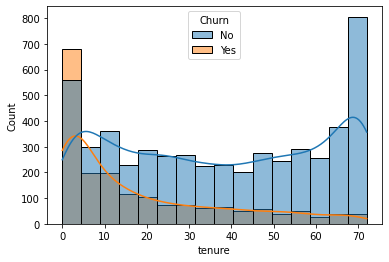

In [10]:
# Membuat figure baru
fig = plt.figure()
# Membuat histogram dengan sumbu x adalah 'tenure', memisahkan warna berdasarkan "Churn"
sns.histplot(data = df, x='tenure', hue = 'Churn', kde=True)
# Menampilkan gambar
plt.show()

##### Nomor 1b:

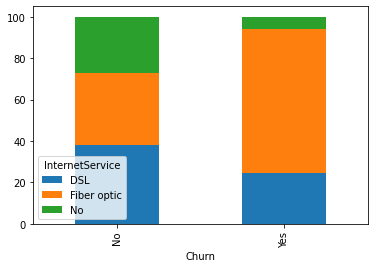

In [11]:
# Mengelompokkan data menggunakan crosstab
df_new = pd.crosstab(df['Churn'], df['InternetService'])
# Membuat presentase aalam dataframe
df_new = df_new.apply(lambda x: x*100/x.sum(), axis = 1)
# Membuat stacked bar plot
df_new = df_new.plot(kind = 'bar', stacked = True)
# Menampilkan gambar
plt.show()

##### Nomor 1c:
Bagi customer yang Churn, paling banyak mereka menggunakan internet Fiber optic.

#### Nomor 2a:

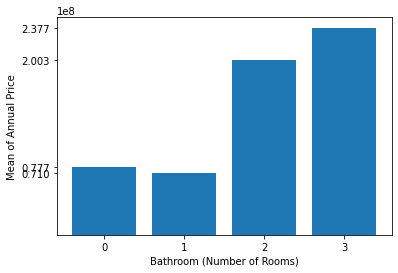

In [12]:
# Mendapatkan data unik dari kolom Bathroom
x = np.arange(len(pd.Series(df2['Bathroom'].unique())))
# Mengelompokkan data menggunakan groupby yang dirata-ratakan menurut kolom Bathroom, & menampilkan kolom AnnualPrice
y = df2.groupby("Bathroom").mean()["AnnualPrice"]

# Menampilkan bar plot
fig = plt.figure()
plt.bar(x, y)
plt.xticks(x)
plt.yticks(y)
plt.xlabel('Bathroom (Number of Rooms)')
plt.ylabel('Mean of Annual Price')
plt.show()

##### Nomor 2b:
Unit Apartment dengan 3 Kamar Mandi memiliki rata-rata Annual Price paling tinggi. 

##### Nomor 3a:

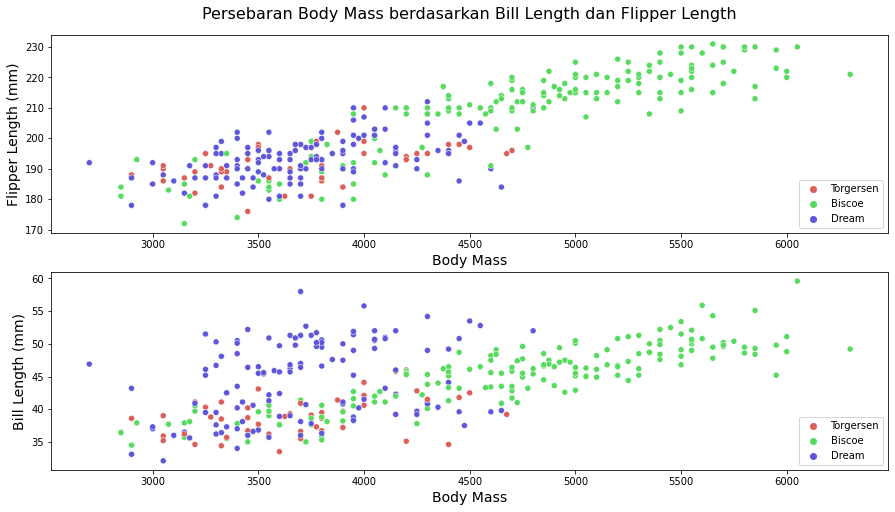

In [16]:
# Membuat figure baru dan membuat 2 baris & 1 kolom dalam 1 figure, serta mengatur ukuran figure
fig, axs = plt.subplots(2)
fig.set_size_inches(15, 8)
# Membuat scatter plot pada baris 1 dan 2
sns.scatterplot(x=df3["body_mass_g"], y=df3["flipper_length_mm"], hue=df3['island'],
                palette=sns.color_palette('hls', 3), ax=axs[0])
sns.scatterplot(x=df3["body_mass_g"], y=df3["bill_length_mm"], hue=df3['island'],
                palette=sns.color_palette('hls', 3), ax=axs[1])
# Mengatur legend, label & judul
axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')
axs[0].set_xlabel('Body Mass', fontsize='14')
axs[1].set_xlabel('Body Mass', fontsize='14')
axs[0].set_ylabel('Flipper Length (mm)', fontsize='14')
axs[1].set_ylabel('Bill Length (mm)', fontsize='14')
axs[0].set_title('Persebaran Body Mass berdasarkan Bill Length dan Flipper Length', fontsize='16', y=1.05)
# Menampilkan gambar
plt.show()

##### Nomor 3b:
Kolom `body_mass_g` lebih baik digunakan untuk memprediksi `flipper_length_mm`.